In [1]:
import numpy as np, pandas as pd,\
       matplotlib.pyplot as plt, seaborn as sns
import sympy as sp
import ggplot as gg
import plotly.plotly as py, plotly.graph_objs as go
pd.options.display.max_columns = 200
sns.set()

sp.init_printing()
%matplotlib inline

/home/god/.venv/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/god/.venv/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/god/.venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('data/GoT/battles.csv')

In [3]:
print(df.columns)
print(df.head())

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')
                            name  year  battle_number  \
0     Battle of the Golden Tooth   298              1   
1    Battle at the Mummer's Ford   298              2   
2             Battle of Riverrun   298              3   
3       Battle of the Green Fork   298              4   
4  Battle of the Whispering Wood   298              5   

              attacker_king             defender_king attacker_1 attacker_2  \
0  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
1  Joffrey/Tommen Baratheon                Robb Stark  Lannister      

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Самые агрессивные и самые забитые</h3> 
    </div>
</div>

Постройте <b>bar chart</b>, отражающий количества битв каждой из семей, сначала нарисуйте всех аттакующих, а на другой график поместите защищающихся. Столбцы должны быть отсортированы.
<br><br>
Выясните, кто нападал чаще всех и кому приходилось отбиваться чаще всех.

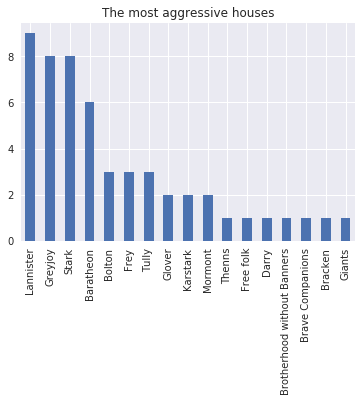

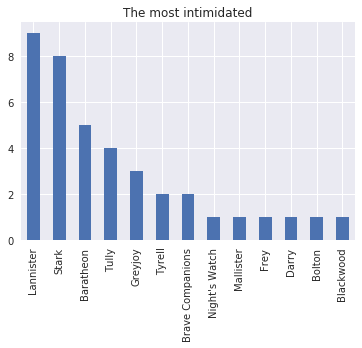

In [4]:
attackers = pd.Series(dtype=int)
defenders = pd.Series(dtype=int)
for i in (1,2,3,4):
    attackers = attackers.add(df['attacker_%s' % i].value_counts(), fill_value=0)
    defenders = defenders.add(df['defender_%s' % i].value_counts(), fill_value=0)
attackers.sort_values(ascending=False, inplace=True)
defenders.sort_values(ascending=False, inplace=True)

plt.title('The most aggressive houses')
attackers.plot.bar()
plt.show()

defenders.plot.bar()
plt.title('The most intimidated')

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Кто дерется лучше всех?</h3> 
    </div>
</div>

Правильно сосчитайте количество побед и поражений у каждого из королей (__attacker_king__, __defender_king__).

Покажите их статистику как stacked bar plot, отсортировав столбцы по общему количество сражений.

In [5]:
kings = df.melt(id_vars=['attacker_outcome'],
                value_vars=['attacker_king', 'defender_king'],
                var_name='attacker',
                value_name='king')
kings['win'] = kings.attacker_outcome.eq('win') == kings.attacker.eq('attacker_king')
kings.drop(['attacker', 'attacker_outcome'], axis=1, inplace=True)
kings = kings.dropna().groupby('king')['win'].value_counts().unstack(fill_value=0)
kings['tot'] = kings[False] + kings[True]
kings.sort_values(by='tot',
                  ascending=False,
                  inplace=True)
kings.drop('tot', axis=1, inplace=True)
kings

win,False,True
king,,
Joffrey/Tommen Baratheon,10,17
Robb Stark,15,9
Balon/Euron Greyjoy,4,7
Stannis Baratheon,5,2
Mance Rayder,0,1
Renly Baratheon,1,0


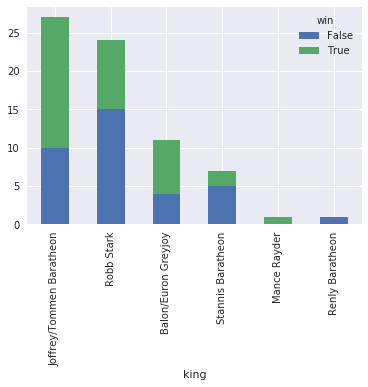

In [6]:
kings.plot.bar(stacked=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Земля, залитая кровью</h3> 
    </div>
</div>

Представим, что в битве столкнулись отряды в 5000 и 15000 человек. Будем считать потери равными <i>2*min(5000, 15000) = 10000</i>. То есть, грубо говоря, всегда побеждает большинство, но из меньшей армии солдат с собой унесет еще хотя бы одного.

Теперь, зная, как высчитывать потери после боя, выясните, в каком конкретно регионе (__region__) и на какой местности (__location__) полегло больше людишек. Два графика: один - по регионам, второй - по месностям.

Проиллюстрируйте результаты с помощью __pie chart__.

In [7]:
armies = df[['location', 'attacker_size', 'defender_size']]\
            .dropna(subset=['attacker_size', 'defender_size'])
armies['deaths'] = 2*armies.loc[:,['attacker_size', 'defender_size']].min(axis=1)
armies

,location,attacker_size,defender_size,deaths
0,Golden Tooth,15000.0,4000.0,8000.0
2,Riverrun,15000.0,10000.0,20000.0
3,Green Fork,18000.0,20000.0,36000.0
4,Whispering Wood,1875.0,6000.0,3750.0
5,Riverrun,6000.0,12625.0,12000.0
10,Torrhen's Square,244.0,900.0,488.0
13,Winterfell,618.0,2000.0,1236.0
14,Oxcross,6000.0,10000.0,12000.0
15,Storm's End,5000.0,20000.0,10000.0
16,Red Fork,20000.0,10000.0,20000.0


In [8]:
deaths_pie = go.Pie(labels=armies['location'], values=armies['deaths'])
py.iplot([deaths_pie], filename='deaths_pie')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~RerumNovarum/0 or inside your plot.ly account where it is named 'deaths_pie'
